#Disney Airlines Feature Exploration and Recommendations

*   **Student Name**: Emily Marsh
*   **Student Pace**: Flex
*   **Scheduled Project Review Date/Time**:
*   **Instructor Name**: Morgan Jones

# Introduction

JustDisney.co, a Walt Disney fan site, released a false rumor about a [Disney airline on Jan 29, 2019](https://). While Disney at the time confirmed the story was false, the viral moment showed that there was considerable interest in this venture. It also evident that the airline industry is ripe for a new player in the field. 2023 is the first year since 2020 and the COVID pandemic, [according to IATA](https://), that airlines will have a net profit position. This net profitability is totaled at USD 9.8 billion. Now that the industry has stabilized due to lower fuel costs and increased travel, the potential profits are an enticing invitation for new companies such as Disney to expand into this promising market.

# Business Objective

The Disney Company is interested in entering the airline industry as a way to create a new profitable enterprise and as a natural addition to streamline the Disney resort and cruise experience that already has a loyal customer base. However, before investing capitol in this new venture, Disney has comissioned this project team to analyze and build a classification model to determine which airline features result in the most satisfied customers. As a company that has strong brand loyalty in its customers, making sure that there is a positive experience in all of its markets is of extreme importance. However, consideration will also be given to the cost to implement the recommended airline features to balance profit with customer experience. Using the dataset and outside research this project will provide insight into the top 10 airline features with the biggest impact on the number of satisfied customers.

# Dataset

The dataset used for this project is a dataset from **Kaggle**, and consists of **1299,880 rows** and **23 columns**. This data was collected by an airline organization. The actual name of the company is not given due to privacy. The dataset consists of the details of customers who have already flown with them. The feedback of the customers on various context and their flight data has been consolidated. The format of the dataset includes the features **Satisfaction, Gender, Customer Type, Age, Type of Travel, Class, Flight Distance, Seat Comfort, Departure/Arrival Time Conveniance, Food & Drink, Gate Location, Inflight Wifi Service, Inflight Entertainment, Online Support, Ease of Online Booking, On-Board Service, Leg Room Service, Baggage Handling, Checkin Service, Cleanliness, Online Boarding, Departure Delay in Minutes, and Arrival Delay in Minutes**. Individuals have two values for satisfaction:

*   **Satisfied**
*   **Dissatisfied**

Since the model will be used for identifying feature importance as well as predicting the satisfaction of the customer, **F1 Score** will be used to assess the accuracy of the models developed using the dataset. The reason for using an **F1 score** versus any other metrics of accuracy is that eliminating false negatives and false positives will ensure the accuracy of the feature recommendations. This model will be designed to be proactive as well as reactive, therefore eliminating false positives and negatives will be the goal.

## Import Libraries

In [53]:
pip install python-json-logger

In [54]:
!pip install sklearn

In [55]:
!pip install scikeras

In [56]:
!pip install causallift

In [57]:
#importing relevant models

import pandas as pd
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost
import tensorflow as tf
import scipy.stats as stats
import math
from scipy import stats
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score,accuracy_score,precision_score,recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.preprocessing import StandardScaler
from causallift import CausalLift
warnings.filterwarnings('ignore')

## Importing TPU for Model Processing

In [58]:
# Connect to TPU
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.TPUStrategy(tpu)
    print('Running on TPU:', tpu.master())
except ValueError:
    strategy = tf.distribute.OneDeviceStrategy("CPU")
    print('Running on CPU')

Running on CPU


In [59]:
# Check TPU status
tpu_available = tf.config.list_logical_devices('TPU')
if tpu_available:
    print("TPU is available.")
else:
    print("No TPU is available.")

No TPU is available.


##Initial Data Exploration

[(0.9155979, 0.55210684, 0.42070204), (0.888292, 0.40830288, 0.36223756), (0.81942908, 0.28911553, 0.38102921), (0.69226314, 0.23413578, 0.42480327), (0.56041794, 0.19845221, 0.44207535), (0.42355299, 0.16934709, 0.42581586)]


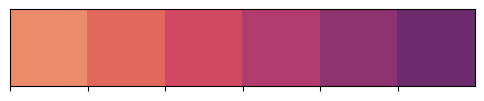

In [60]:
#creating a consistent color palatte for visualizations
pal = sns.color_palette("flare")
print(pal)
sns.palplot(pal)

In [61]:
#Using CSV reader to read dataframe into pandas

df = pd.read_csv('/content/drive/MyDrive/Flatiron DS Program/Capstone Project/Data/Invistico_Airline.csv')

In [62]:
#initial overview of datasets columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [63]:
#cleaning column labels
df.rename(columns = {'satisfaction':'Satisfaction'}, inplace=True)

In [64]:
#examining new column label
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [65]:
#Exploring the value counts of the target feature
df['Satisfaction'].value_counts()

satisfied       71087
dissatisfied    58793
Name: Satisfaction, dtype: int64

In [66]:
#exploring the total amount of columns and rows in dataset

df

,Satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


In [67]:
#dataset value cleaning
df.update(df['Customer Type'].replace({'disloyal Customer': 'Disloyal Customer'}))

In [68]:
#additional dataset value cleaning
df.update(df['Type of Travel'].replace({'Business travel': 'Business Travel'}))

In [69]:
#examining new value labels
df

,Satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Female,Disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,Disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,Male,Disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,Male,Disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


In [70]:
#exploring overall shape of dataframe
df.shape

(129880, 23)

In [71]:
#exploration of distribution of values within the dataframe
df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


# Data Understanding

Within this dataset, there are object, float, and integer datatypes. This means that all object datatype features will need to be processed in order to create a model that will be able to properly run using the information contained in this dataset. In order to choose the appropriate categorical processing tool, the amount of possible values for each feature must be determined. Additional investigation will also be necessary to determine if there are any null values in the dataset that could interfere with accurate results.

##Check for Null Values

In [72]:
#checking for null value
df.isna().sum()

Satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

Of all the columns in the dataframe, only Arrival Delay in Minutes has any null values. Since the amount of rows with **null values is 393**, this is insignificant amount of rows compared to the total amount found in the dataset. Therefore the **393 rows** with null values will be dropped.

In [73]:
#dropping all rows with null values
dfnn = df.dropna()

In [74]:
#checking to make sure all null values are dropped
dfnn.isna().sum()

Satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [75]:
#examining new dataframe shape after dropping null values
dfnn.shape

(129487, 23)

## Checking Datatypes

In order to use the information in the dataset to create a model, features must be either a float or integer. In order to convert these categorical columns several pre-processing tools are available for use. Deciding which one to use will be determined by the amount of unique values in each column.

In [76]:
# examining the data types of the df
dfnn.dtypes.value_counts()

int64      17
object      5
float64     1
dtype: int64

# Categorical Data Processing

There are two types of categorical data in the dataset. One is binary, meaning there are only two possible values. The other is multi-categorical, meaning more then two possible values for the feature. These two categorical types will be processed the same since the distinct different values of the features will be important when determining feature importance. One hot encoder will be used so that the model will be able to determine the effect each of the possible values have on the dependent variable. One hot encoder will split the possible values of the feature so that each value will have its own individual column with a numerical value.

In [77]:
#examining unique values

dfnn.nunique()

Satisfaction                            2
Gender                                  2
Customer Type                           2
Age                                    75
Type of Travel                          2
Class                                   3
Flight Distance                      5397
Seat comfort                            6
Departure/Arrival time convenient       6
Food and drink                          6
Gate location                           6
Inflight wifi service                   6
Inflight entertainment                  6
Online support                          6
Ease of Online booking                  6
On-board service                        6
Leg room service                        6
Baggage handling                        5
Checkin service                         6
Cleanliness                             6
Online boarding                         6
Departure Delay in Minutes            464
Arrival Delay in Minutes              472
dtype: int64

## Processing Satisfaction

Since the different values of satisfaction have an inherent ordered relationship and is the target feature, this type of pre-processing using cat codes will assign numeric values that reflect this relationship to make interpretation easier later on.

In [78]:
#examining unique values of satisfaction column
dfnn['Satisfaction'].value_counts()

satisfied       70882
dissatisfied    58605
Name: Satisfaction, dtype: int64

In [79]:
#assigning numeric values to satisfaction
dfnn['Satisfaction'] = pd.Categorical(dfnn['Satisfaction'], ['satisfied', 'dissatisfied'], ordered=True)
dfnn['Satisfaction'] = dfnn['Satisfaction'].cat.codes

In [80]:
#checking numeric values
dfnn['Satisfaction'].value_counts()

0    70882
1    58605
Name: Satisfaction, dtype: int64

## Processing Gender

In [81]:
#create a variable
gender_aspect = dfnn[["Gender"]]

# Instantiate a OneHotEncoder with categories="auto",
# sparse=False, and handle_unknown="ignore"
ohe = OneHotEncoder(categories="auto", sparse=False, handle_unknown="ignore")

# Fit the encoder on the age_aspect
ohe.fit(gender_aspect)

# Inspect the categories of the fitted encoder
ohe.categories_

[array(['Female', 'Male'], dtype=object)]

In [82]:
# Transform gender_aspect using the encoder and assign the result to gender_aspect_encoded
gender_aspect_encoded = ohe.transform(gender_aspect)

# Visually inspect age_aspect_encoded
gender_aspect_encoded

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [83]:
# Make the transformed data into a dataframe
gender_aspect_encoded = pd.DataFrame(
    # Pass in NumPy array
    gender_aspect_encoded,
    # Set the column names to the categories found by OHE
    columns=ohe.categories_[0],
    # Set the index to match data's index
    index=dfnn.index
)

# Visually inspect new dataframe
gender_aspect_encoded

,Female,Male
0,1.0,0.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
129875,1.0,0.0
129876,0.0,1.0
129877,0.0,1.0
129878,0.0,1.0


In [84]:
# Drop original Gender column
dfnn.drop("Gender", axis=1, inplace=True)

# Visually inspect data
dfnn

,Satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,0,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,0,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,0,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,0,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,0,Disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,3,...,2,2,3,3,4,4,4,2,0,0.0
129876,1,Disloyal Customer,63,Personal Travel,Business,2087,2,3,2,4,...,1,3,2,3,3,1,2,1,174,172.0
129877,1,Disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,1,Disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,2,...,2,3,3,2,3,2,1,2,193,205.0


In [85]:
# Concatenate the new dataframe with current data
dfnn = pd.concat([dfnn, gender_aspect_encoded], axis=1)

# Visually inspect data
dfnn

,Satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Female,Male
0,0,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,3,0,3,5,3,2,0,0.0,1.0,0.0
1,0,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,4,4,4,2,3,2,310,305.0,0.0,1.0
2,0,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,3,3,4,4,4,2,0,0.0,1.0,0.0
3,0,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,1,0,1,4,1,3,0,0.0,1.0,0.0
4,0,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,2,0,2,4,2,5,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,0,Disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,3,...,3,3,4,4,4,2,0,0.0,1.0,0.0
129876,1,Disloyal Customer,63,Personal Travel,Business,2087,2,3,2,4,...,2,3,3,1,2,1,174,172.0,0.0,1.0
129877,1,Disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,3,...,4,3,4,2,3,2,155,163.0,0.0,1.0
129878,1,Disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,2,...,3,2,3,2,1,2,193,205.0,0.0,1.0


The one hot encoder has successfully processed the gender feature and assigned each of the possible two values its own column. Not only will this help the dataset be used to create a model, but it will also help identify the impact each of the values of each feature has on the dependent variable. Since one hot encoder was successful in processing the Gender feature, it will now be used on the remaining object datatype features.

## Processing Customer Type

In [86]:
#using onehotencoder on customer type feature
cus_aspect = dfnn[["Customer Type"]]
ohe.fit(cus_aspect)
cus_aspect_encoded = ohe.transform(cus_aspect)
cus_aspect_encoded = pd.DataFrame(
    cus_aspect_encoded,
    columns=ohe.categories_[0],
    index=dfnn.index)

dfnn.drop("Customer Type", axis=1, inplace=True)

dfnn = pd.concat([dfnn, cus_aspect_encoded], axis=1)

dfnn

,Satisfaction,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,...,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Female,Male,Disloyal Customer,Loyal Customer
0,0,65,Personal Travel,Eco,265,0,0,0,2,2,...,3,5,3,2,0,0.0,1.0,0.0,0.0,1.0
1,0,47,Personal Travel,Business,2464,0,0,0,3,0,...,4,2,3,2,310,305.0,0.0,1.0,0.0,1.0
2,0,15,Personal Travel,Eco,2138,0,0,0,3,2,...,4,4,4,2,0,0.0,1.0,0.0,0.0,1.0
3,0,60,Personal Travel,Eco,623,0,0,0,3,3,...,1,4,1,3,0,0.0,1.0,0.0,0.0,1.0
4,0,70,Personal Travel,Eco,354,0,0,0,3,4,...,2,4,2,5,0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,0,29,Personal Travel,Eco,1731,5,5,5,3,2,...,4,4,4,2,0,0.0,1.0,0.0,1.0,0.0
129876,1,63,Personal Travel,Business,2087,2,3,2,4,2,...,3,1,2,1,174,172.0,0.0,1.0,1.0,0.0
129877,1,69,Personal Travel,Eco,2320,3,0,3,3,3,...,4,2,3,2,155,163.0,0.0,1.0,1.0,0.0
129878,1,66,Personal Travel,Eco,2450,3,2,3,2,3,...,3,2,1,2,193,205.0,0.0,1.0,1.0,0.0


## Processing Type of Travel

In [87]:
#using onehotencoder on type of travel feature
type_aspect = dfnn[["Type of Travel"]]
ohe.fit(type_aspect)
type_aspect_encoded = ohe.transform(type_aspect)
type_aspect_encoded = pd.DataFrame(
    type_aspect_encoded,
    columns=ohe.categories_[0],
    index=dfnn.index)

dfnn.drop("Type of Travel", axis=1, inplace=True)

dfnn = pd.concat([dfnn, type_aspect_encoded], axis=1)

dfnn

,Satisfaction,Age,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,...,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Female,Male,Disloyal Customer,Loyal Customer,Business Travel,Personal Travel
0,0,65,Eco,265,0,0,0,2,2,4,...,3,2,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,0,47,Business,2464,0,0,0,3,0,2,...,3,2,310,305.0,0.0,1.0,0.0,1.0,0.0,1.0
2,0,15,Eco,2138,0,0,0,3,2,0,...,4,2,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0,60,Eco,623,0,0,0,3,3,4,...,1,3,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0,70,Eco,354,0,0,0,3,4,3,...,2,5,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,0,29,Eco,1731,5,5,5,3,2,5,...,4,2,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
129876,1,63,Business,2087,2,3,2,4,2,1,...,2,1,174,172.0,0.0,1.0,1.0,0.0,0.0,1.0
129877,1,69,Eco,2320,3,0,3,3,3,2,...,3,2,155,163.0,0.0,1.0,1.0,0.0,0.0,1.0
129878,1,66,Eco,2450,3,2,3,2,3,2,...,1,2,193,205.0,0.0,1.0,1.0,0.0,0.0,1.0


## Processing Class

In [88]:
#using onehotencoder on class feature
class_aspect = dfnn[["Class"]]
ohe.fit(class_aspect)
class_aspect_encoded = ohe.transform(class_aspect)
class_aspect_encoded = pd.DataFrame(
    class_aspect_encoded,
    columns=ohe.categories_[0],
    index=dfnn.index)

dfnn.drop("Class", axis=1, inplace=True)

dfnn = pd.concat([dfnn, class_aspect_encoded], axis=1)

In [89]:
#examining new dataset with transformed object datatype features
dfnn

,Satisfaction,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,...,Arrival Delay in Minutes,Female,Male,Disloyal Customer,Loyal Customer,Business Travel,Personal Travel,Business,Eco,Eco Plus
0,0,65,265,0,0,0,2,2,4,2,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0,47,2464,0,0,0,3,0,2,2,...,305.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,0,15,2138,0,0,0,3,2,0,2,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0,60,623,0,0,0,3,3,4,3,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0,70,354,0,0,0,3,4,3,4,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,0,29,1731,5,5,5,3,2,5,2,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
129876,1,63,2087,2,3,2,4,2,1,1,...,172.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
129877,1,69,2320,3,0,3,3,3,2,2,...,163.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
129878,1,66,2450,3,2,3,2,3,2,2,...,205.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [90]:
#examining new dataframe shape
dfnn.shape

(129487, 28)

In [91]:
#examining new columns of dataframe
dfnn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 28 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Satisfaction                       129487 non-null  int8   
 1   Age                                129487 non-null  int64  
 2   Flight Distance                    129487 non-null  int64  
 3   Seat comfort                       129487 non-null  int64  
 4   Departure/Arrival time convenient  129487 non-null  int64  
 5   Food and drink                     129487 non-null  int64  
 6   Gate location                      129487 non-null  int64  
 7   Inflight wifi service              129487 non-null  int64  
 8   Inflight entertainment             129487 non-null  int64  
 9   Online support                     129487 non-null  int64  
 10  Ease of Online booking             129487 non-null  int64  
 11  On-board service                   1294

Now that all of the original 5 categorical features have been split into 9 float and integer columns, the dataset is properly prepared to be used for additional analysis and model building.

# Dataset Exploration and Initial Analysis

Now that the categorical features have been processed, some intial data exploration and analysis is helpful in understanding initial trends within the dataset before begining to build the baseline models.

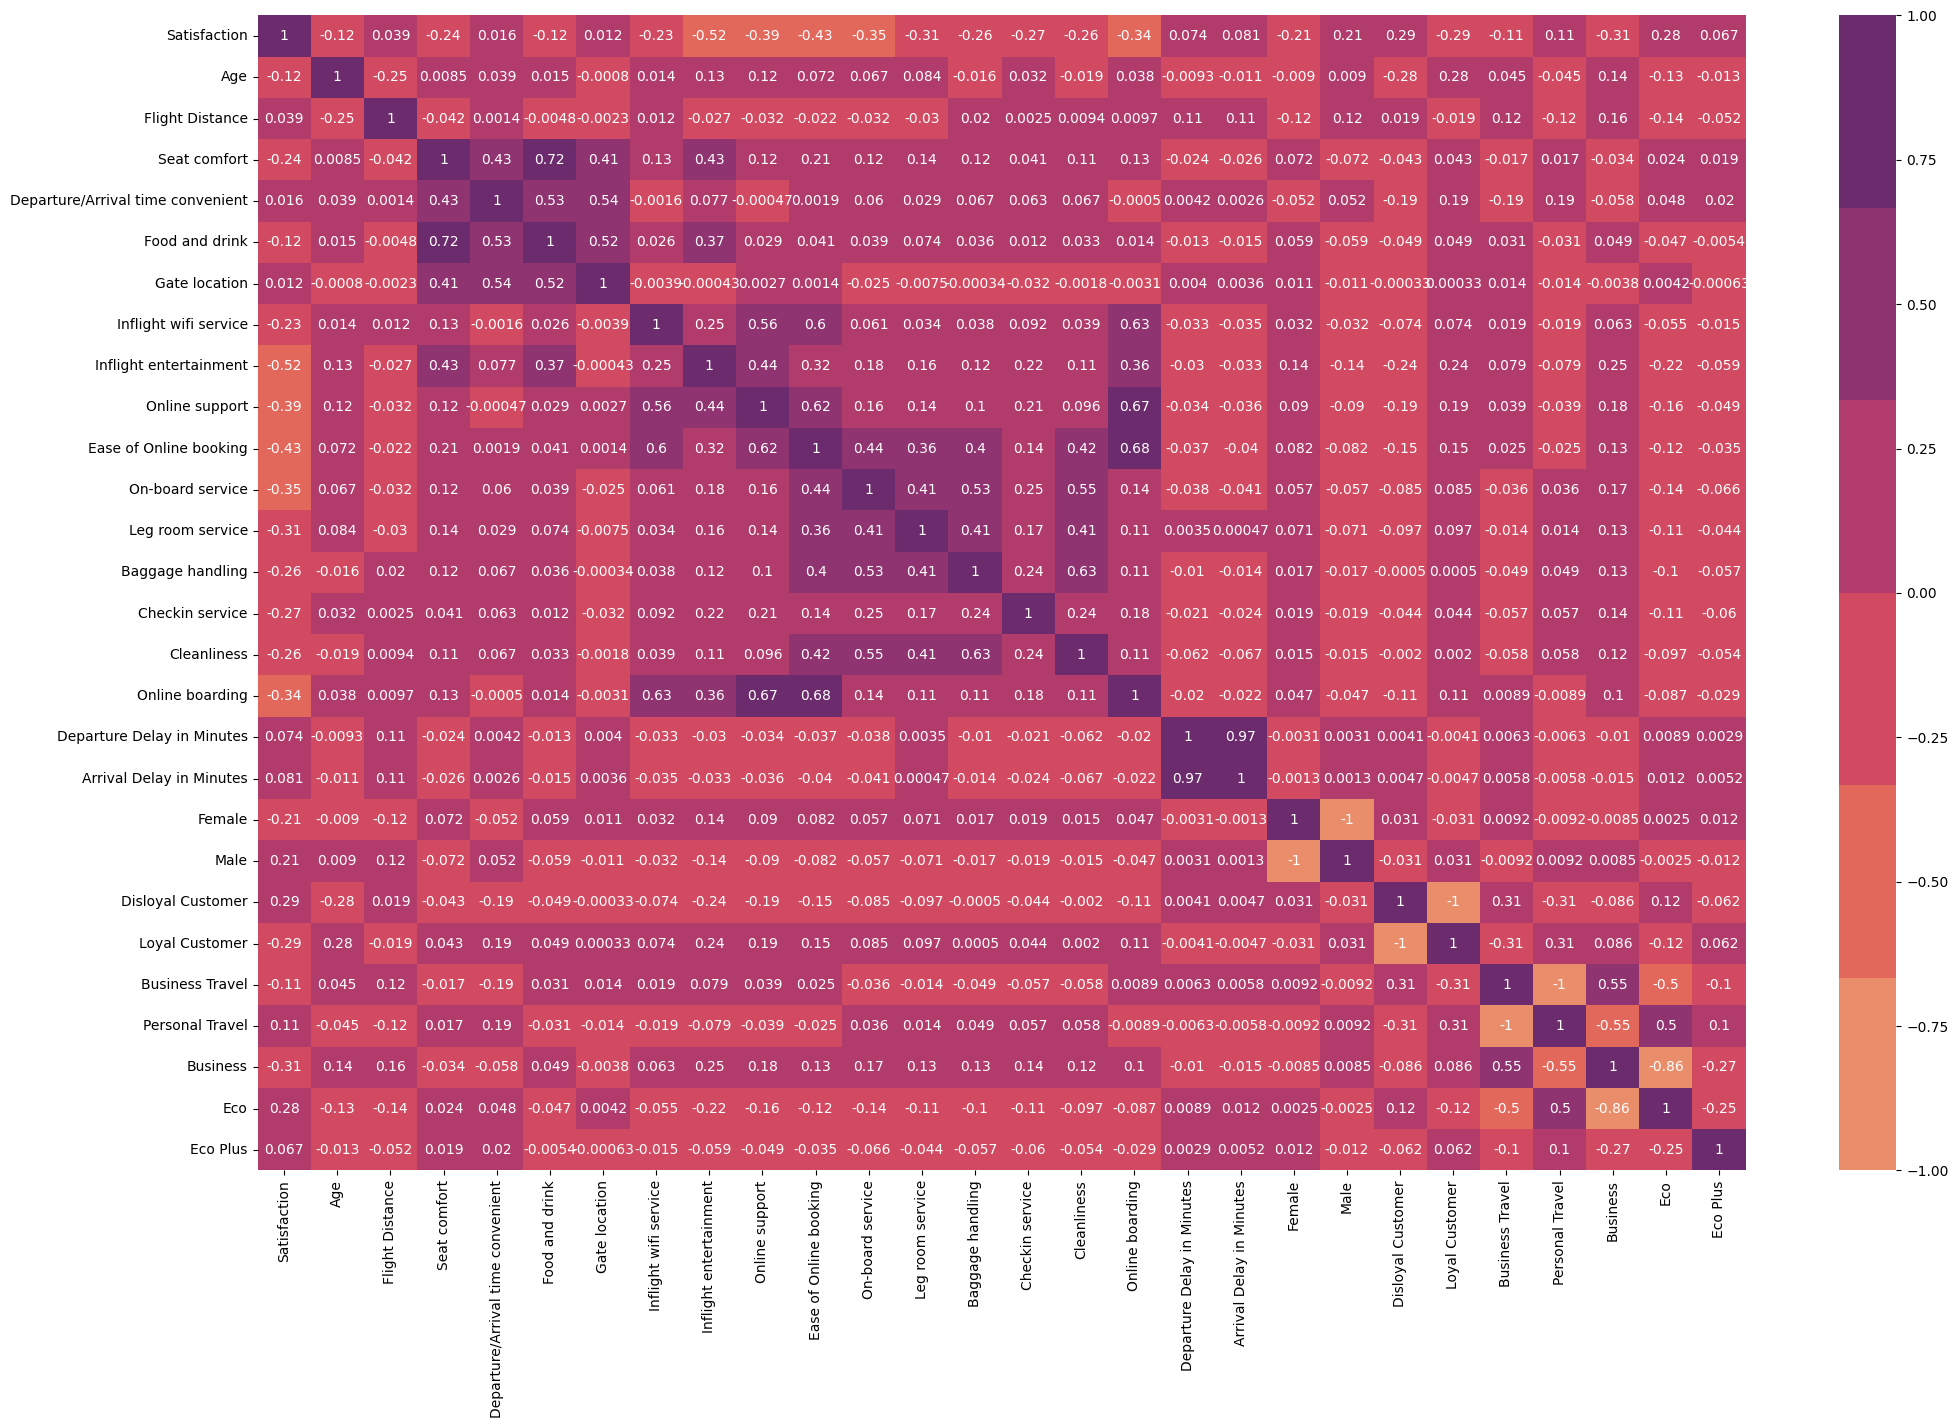

In [92]:
# Early correlation matrix to understand relationships within the features that are being analyzed

plt.figure(figsize= (24,15))
corrM = dfnn.corr()

sns.heatmap(corrM, annot = True, cmap=pal)
plt.show()


The correlation matrix seems to indicate that no one variable highly correlates with satisfaction level, either positvely or negatively. This may indicate that no one feature has an outsized impact on the dependent variable. There is also high correlation between categorical feature values from the same feature that have been processed into seperate columns which would be expected. Finally, there are several features that seem heavily correlated with each other. The highest correlation value is between Departure Delay and Arrival Delay, which makes sense since usually a departure delay results in an arrival delay. There is also a high correlation value between online features such as online booking and online check in however not as high as arrival and departure.

In [93]:
dfnn.describe()

,Satisfaction,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,...,Arrival Delay in Minutes,Female,Male,Disloyal Customer,Loyal Customer,Business Travel,Personal Travel,Business,Eco,Eco Plus
count,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,...,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,0.452594,39.428761,1981.008974,2.838586,2.990277,2.852024,2.990377,3.249160,3.383745,3.519967,...,15.091129,0.507410,0.492590,0.183138,0.816862,0.690764,0.309236,0.478735,0.448825,0.072440
std,0.497749,15.117597,1026.884131,1.392873,1.527183,1.443587,1.305917,1.318765,1.345959,1.306326,...,38.465650,0.499947,0.499947,0.386781,0.386781,0.462180,0.462180,0.499550,0.497376,0.259216
min,0.000000,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,40.000000,1924.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,51.000000,2543.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,...,13.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,1584.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Looking at the distribution of values within the features, scaling could be an issue since all of the values in the dataset vary widely between object dataypes, float and integer features. There is a variety of distributions within the different features. For example for Gender there seems to be a roughly equal distribtuion of men and women, but for type of travel the majority of entries were traveling for business. This distribution could contribute to an uneven dataset.

# Dataset Preprocessing

## Dropping Departure Delay Column

In [94]:
dfnn = dfnn.drop(columns = ['Departure Delay in Minutes'])

## Creating A Sample of Larger Dataset

Since the dataset is large, a more efficent way to utilize computational resources is to take a sampling of the dataset. There are several techniques for sampling or subsetting. These several techniques will be explored and one will be selected for model building.

## Determine the Number of Samples

Determining the appropriate sample size depends on several factors, including the desired level of precision, confidence level, and the dataset's variability. There is no fixed rule for determining the sample size, but a statistical formula, such as Yamane's formula, can be used to estimate a reasonable sample size.

In [95]:
def calculate_yamane_sample_size(population_size, confidence_level, margin_of_error):
    """
    Calculate sample size using Yamane's formula.

    Args:
        population_size (int): Total size of the population.
        confidence_level (float): Desired confidence level (between 0 and 1).
        margin_of_error (float): Desired margin of error (between 0 and 1).

    Returns:
        int: Sample size estimation.

    """
    n = population_size / (1 + population_size * (margin_of_error**2))
    n = n / (1 + (n - 1) / population_size * (confidence_level**2))

    return math.ceil(n)

# Example usage:
population_size = 129487
confidence_level = 0.99
margin_of_error = 0.01

sample_size = calculate_yamane_sample_size(population_size, confidence_level, margin_of_error)
print("Yamane's estimated sample size:", sample_size)

Yamane's estimated sample size: 8674


## Random Sampling

Random sampling means randomly selecting a subset of data points from the original dataset. This method is useful in creating a representative sample of the larger dataset.

In [96]:
sample_size = 8674  # Desired size of the smaller dataset

# Randomly sample the data
smaller_dataset = dfnn.sample(n=sample_size, random_state=42)

In [97]:
smaller_dataset

,Satisfaction,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,...,Arrival Delay in Minutes,Female,Male,Disloyal Customer,Loyal Customer,Business Travel,Personal Travel,Business,Eco,Eco Plus
98180,0,37,3785,4,4,4,4,4,5,4,...,9.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
24974,1,60,1784,3,4,3,1,5,3,2,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
69242,1,27,1825,2,3,4,3,2,1,2,...,57.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
90488,0,50,2024,4,4,2,2,4,4,4,...,129.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
36205,1,70,1435,4,4,4,5,5,4,5,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124457,0,47,3277,4,4,4,4,4,4,4,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
125675,0,40,3881,1,1,1,1,3,4,4,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
36177,1,23,1334,4,4,4,5,4,4,4,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
98259,0,57,1074,2,2,2,2,5,4,4,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [98]:
smaller_dataset['Satisfaction'].value_counts()

0    4684
1    3990
Name: Satisfaction, dtype: int64

## Train Test Split

In [99]:
#split dataset into dependent variables and indepedent variables

aspects = smaller_dataset.drop(columns=['Satisfaction'], axis=1)
target = smaller_dataset['Satisfaction']

In [100]:
#initial inspection of the distribution of values
aspects.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,...,Arrival Delay in Minutes,Female,Male,Disloyal Customer,Loyal Customer,Business Travel,Personal Travel,Business,Eco,Eco Plus
count,8674.000000,8674.000000,8674.000000,8674.000000,8674.000000,8674.000000,8674.000000,8674.000000,8674.000000,8674.000000,...,8674.000000,8674.000000,8674.000000,8674.000000,8674.000000,8674.000000,8674.000000,8674.000000,8674.000000,8674.000000
mean,39.430021,1987.138806,2.829721,2.980632,2.846092,2.979248,3.243371,3.362578,3.515448,3.461609,...,15.073784,0.501038,0.498962,0.189417,0.810583,0.696103,0.303897,0.479133,0.448351,0.072516
std,14.988223,1018.961819,1.402157,1.536547,1.457715,1.306145,1.327812,1.361064,1.313810,1.319034,...,38.674762,0.500028,0.500028,0.391862,0.391862,0.459965,0.459965,0.499593,0.497354,0.259355
min,7.000000,50.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1370.250000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,40.000000,1946.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,2540.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,...,13.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,85.000000,6813.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,729.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [101]:
dfnn.describe()

,Satisfaction,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,...,Arrival Delay in Minutes,Female,Male,Disloyal Customer,Loyal Customer,Business Travel,Personal Travel,Business,Eco,Eco Plus
count,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,...,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,0.452594,39.428761,1981.008974,2.838586,2.990277,2.852024,2.990377,3.249160,3.383745,3.519967,...,15.091129,0.507410,0.492590,0.183138,0.816862,0.690764,0.309236,0.478735,0.448825,0.072440
std,0.497749,15.117597,1026.884131,1.392873,1.527183,1.443587,1.305917,1.318765,1.345959,1.306326,...,38.465650,0.499947,0.499947,0.386781,0.386781,0.462180,0.462180,0.499550,0.497376,0.259216
min,0.000000,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,40.000000,1924.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,51.000000,2543.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,...,13.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,1584.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [102]:
#inspection of dependent variable distribution
target.value_counts()

0    4684
1    3990
Name: Satisfaction, dtype: int64

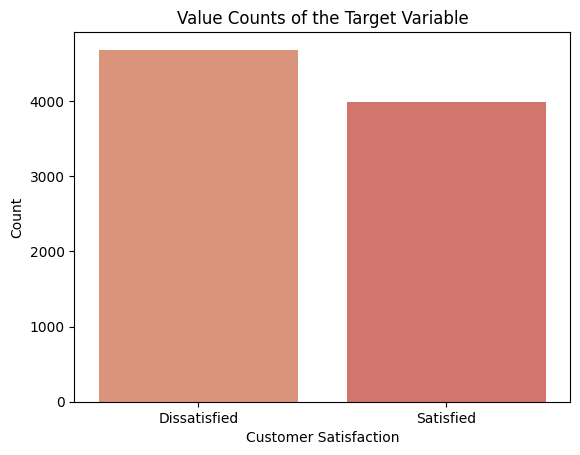

In [103]:
#creating a visualization of target value counts
ax = sns.countplot(x= target.index, data=target, palette=pal)
plt.title('Value Counts of the Target Variable')
plt.xlabel('Customer Satisfaction')
plt.ylabel('Count')
ax.set_xticklabels(['Dissatisfied', 'Satisfied'])
plt.show()


The distribution of the dependent variable values in this dataset are not equally distributed. There are more dissatisfied values then there are satisfied values. This unequal distribution will need to be taken into account when assessing the accuracy of the model.

# Building Baseline Models

In order to determine which baseline model is appropriate for the dataset, three initial models will be built. Once built, the most accurate baseline model will be selected to fine tune and determine feature importance. The F1 score will be used as a determinate of which model is the most accurate. The reason the F1 score will be used is that, as an expression of the precision and recall of the model, the higest F1 score limits the amount of false positives and false negatives. This is important since the project wants a model to correctly predict the satisfaction & dissatisfaction of consumers.

## Baseline Logistic Regression Model

A baseline logistic regression model is a simple and interpretable statistical model used for binary classification. It assumes a linear relationship between input features and the log-odds of the target class, estimating probabilities using the logistic function. Though it has limitations, logistic regression serves as a practical and transparent starting point for creating a baseline model for the dataset.

In [104]:
#instatiate a test train split

X = aspects
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, \
                                                    random_state = 42)

In [105]:
#instantiate logistic regression model
logreg = LogisticRegression(random_state=123)

#fit the model onto the train sets
logreg.fit(X_train,y_train)
logreg

#predict values of the model
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

#evaluate model
names = ['Satisfied','Dissatisfied']
f1_logreg = round(f1_score(y_test,y_hat_test,average='macro'),3)
print(classification_report(y_test,y_hat_test,target_names=names))

              precision    recall  f1-score   support

   Satisfied       0.78      0.83      0.80      1180
Dissatisfied       0.78      0.72      0.75       989

    accuracy                           0.78      2169
   macro avg       0.78      0.78      0.78      2169
weighted avg       0.78      0.78      0.78      2169



## Baseline KNN Model

A K-nearest neighbors (KNN) model is a flexible and non-parametric algorithm used for classification tasks. It classifies instances by finding the K nearest neighbors in the training data based on their feature similarity and assigns the majority class label among them to the new instance. KNN does not assume any underlying distribution of data and can capture complex decision boundaries. However, it can be sensitive to the choice of K and may struggle with high-dimensional data

In [106]:
#instantiate
knn_baseline_model = KNeighborsClassifier()

#fit onto the data
knn_baseline_model.fit(X_train,y_train)

#predict
y_hat_train = knn_baseline_model.predict(X_train)
y_hat_test = knn_baseline_model.predict(X_test)

#evaluate model
f1_knn = round(f1_score(y_test,y_hat_test,average='macro'),3)
print(classification_report(y_test,y_hat_test,target_names=names))

              precision    recall  f1-score   support

   Satisfied       0.62      0.66      0.64      1180
Dissatisfied       0.56      0.52      0.54       989

    accuracy                           0.59      2169
   macro avg       0.59      0.59      0.59      2169
weighted avg       0.59      0.59      0.59      2169



## Baseline Decision Tree Model

A decision tree model is a versatile and interpretable algorithm for classification. It creates a hierarchical structure of decision rules based on input features, capturing complex relationships. While prone to overfitting, decision trees offer transparency and serve as a baseline for classification tasks.

In [107]:
#instantiate
clf = DecisionTreeClassifier(criterion='entropy',random_state=123)

#fit the model onto the train sets
clf.fit(X_train,y_train)

#predict
y_hat_train = clf.predict(X_train)
y_hat_test = clf.predict(X_test)

#evaluate model
f1_tree = round(f1_score(y_test,y_hat_test,average='macro'),3)
print(classification_report(y_test,y_hat_test,target_names=names))

              precision    recall  f1-score   support

   Satisfied       0.92      0.91      0.92      1180
Dissatisfied       0.89      0.91      0.90       989

    accuracy                           0.91      2169
   macro avg       0.91      0.91      0.91      2169
weighted avg       0.91      0.91      0.91      2169



## Selecting A Baseline Model

In [108]:
#import the metrics library
print(f'f1-score of baseline logistic regression is {f1_logreg}')
print(f'f1-score of knn model is {f1_knn}')
print(f'f1-score of baseline decision tree is {f1_tree}')

f1-score of baseline logistic regression is 0.778
f1-score of knn model is 0.587
f1-score of baseline decision tree is 0.908


Comparing all three baseline model's F1 scores on the test dataset, it appears that the baseline decision tree model's F1 score for the test dataset is significantly higher then the KNN baseline model's and the logistic regression model's F1 scores. Knowing this, further exploration and modifications will be implemented to improve the performance of the decision tree model.

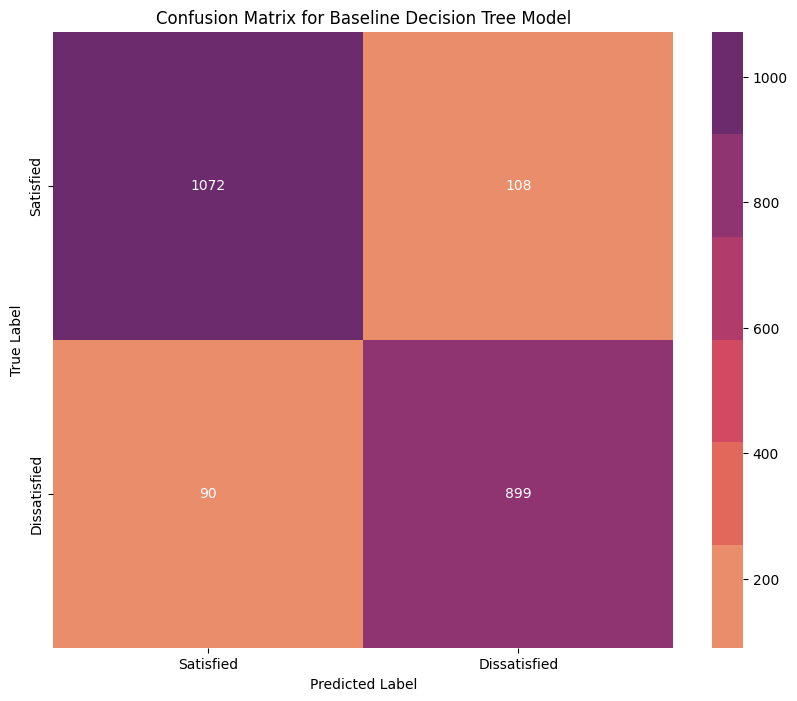

In [109]:
#Confusion Matrix for Baseline Decision Tree Model
cm = confusion_matrix(y_test, y_hat_test)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap=pal, xticklabels=names, yticklabels=names)
plt.title("Confusion Matrix for Baseline Decision Tree Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

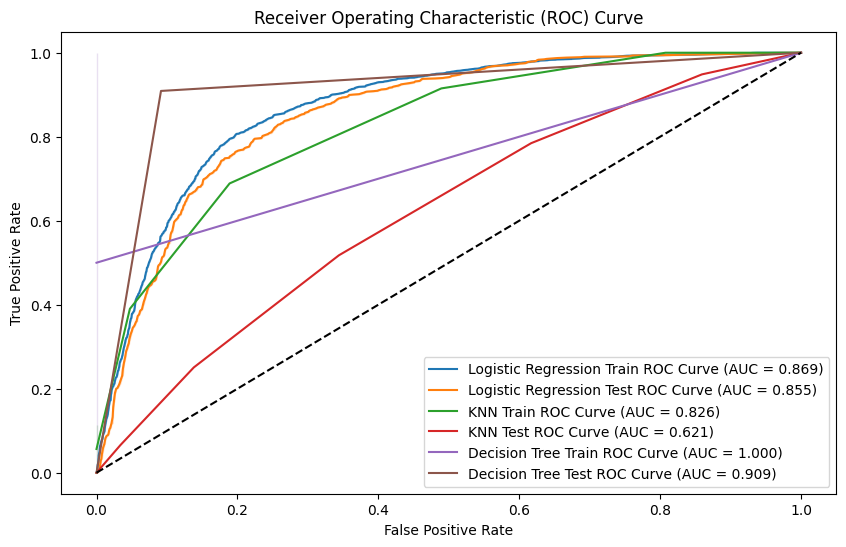

In [110]:
# Obtain predicted probabilities for positive class
y_prob_logreg_train = logreg.predict_proba(X_train)[:, 1]
y_prob_logreg_test = logreg.predict_proba(X_test)[:, 1]

y_prob_knn_train = knn_baseline_model.predict_proba(X_train)[:, 1]
y_prob_knn_test = knn_baseline_model.predict_proba(X_test)[:, 1]

y_prob_clf_train = clf.predict_proba(X_train)[:, 1]
y_prob_clf_test = clf.predict_proba(X_test)[:, 1]


# Compute false positive rate (FPR), true positive rate (TPR), and thresholds for each model
fpr_logreg_train, tpr_logreg_train, thresholds_logreg_train = roc_curve(y_train, y_prob_logreg_train)
fpr_logreg_test, tpr_logreg_test, thresholds_logreg_test = roc_curve(y_test, y_prob_logreg_test)

fpr_knn_train, tpr_knn_train, thresholds_knn_train = roc_curve(y_train, y_prob_knn_train)
fpr_knn_test, tpr_knn_test, thresholds_knn_test = roc_curve(y_test, y_prob_knn_test)

fpr_clf_train, tpr_clf_train, thresholds_clf_train = roc_curve(y_train, y_prob_clf_train)
fpr_clf_test, tpr_clf_test, thresholds_clf_test = roc_curve(y_test, y_prob_clf_test)

# Compute area under the ROC curve (AUC) for each model
auc_logreg_train = auc(fpr_logreg_train, tpr_logreg_train)
auc_logreg_test = auc(fpr_logreg_test, tpr_logreg_test)

auc_knn_train = auc(fpr_knn_train, tpr_knn_train)
auc_knn_test = auc(fpr_knn_test, tpr_knn_test)

auc_clf_train = auc(fpr_clf_train, tpr_clf_train)
auc_clf_test = auc(fpr_clf_test, tpr_clf_test)

# Create DataFrames for the ROC curve data of each model
roc_df_logreg_train = pd.DataFrame({'False Positive Rate': fpr_logreg_train, 'True Positive Rate': tpr_logreg_train})
roc_df_logreg_test = pd.DataFrame({'False Positive Rate': fpr_logreg_test, 'True Positive Rate': tpr_logreg_test})

roc_df_knn_train = pd.DataFrame({'False Positive Rate': fpr_knn_train, 'True Positive Rate': tpr_knn_train})
roc_df_knn_test = pd.DataFrame({'False Positive Rate': fpr_knn_test, 'True Positive Rate': tpr_knn_test})

roc_df_clf_train = pd.DataFrame({'False Positive Rate': fpr_clf_train, 'True Positive Rate': tpr_clf_train})
roc_df_clf_test = pd.DataFrame({'False Positive Rate': fpr_clf_test, 'True Positive Rate': tpr_clf_test})

# Plot the ROC curves using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=roc_df_logreg_train, x='False Positive Rate', y='True Positive Rate', label=f'Logistic Regression Train ROC Curve (AUC = {auc_logreg_train:.3f})')
sns.lineplot(data=roc_df_logreg_test, x='False Positive Rate', y='True Positive Rate', label=f'Logistic Regression Test ROC Curve (AUC = {auc_logreg_test:.3f})')

sns.lineplot(data=roc_df_knn_train, x='False Positive Rate', y='True Positive Rate', label=f'KNN Train ROC Curve (AUC = {auc_knn_train:.3f})')
sns.lineplot(data=roc_df_knn_test, x='False Positive Rate', y='True Positive Rate', label=f'KNN Test ROC Curve (AUC = {auc_knn_test:.3f})')

sns.lineplot(data=roc_df_clf_train, x='False Positive Rate', y='True Positive Rate', label=f'Decision Tree Train ROC Curve (AUC = {auc_clf_train:.3f})')
sns.lineplot(data=roc_df_clf_test, x='False Positive Rate', y='True Positive Rate', label=f'Decision Tree Test ROC Curve (AUC = {auc_clf_test:.3f})')

plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show();

# Decision Tree Model

In [111]:
#re-run the basline model so all variables are updated correctly
#for the train and test sets

#instantiate
clf = DecisionTreeClassifier(criterion='entropy',random_state=123)

#fit the model onto the train sets
clf.fit(X_train,y_train)
clf

#predict
y_tree_train = clf.predict(X_train)
y_tree_test = clf.predict(X_test)

print('TRAIN SCORES')
print(classification_report(y_train,y_tree_train,target_names=names))
print('--------------------------------------------------------------')
print('TEST SCORES')
print(classification_report(y_test,y_tree_test,target_names=names))

accuracy_tree_train = accuracy_score(y_train,y_tree_train)
accuracy_tree_test = accuracy_score(y_test,y_tree_test)

f1_score_tree_train = f1_score(y_train,y_hat_train,average='macro')
f1_score_tree_test = f1_score(y_test,y_hat_test,average='macro')

TRAIN SCORES
              precision    recall  f1-score   support

   Satisfied       1.00      1.00      1.00      3504
Dissatisfied       1.00      1.00      1.00      3001

    accuracy                           1.00      6505
   macro avg       1.00      1.00      1.00      6505
weighted avg       1.00      1.00      1.00      6505

--------------------------------------------------------------
TEST SCORES
              precision    recall  f1-score   support

   Satisfied       0.92      0.91      0.92      1180
Dissatisfied       0.89      0.91      0.90       989

    accuracy                           0.91      2169
   macro avg       0.91      0.91      0.91      2169
weighted avg       0.91      0.91      0.91      2169



Looking at the performance of the train dataset versus the test dataset in the Decision Tree Model, it appears the model is over fitting to the training data as is common with these types of models. In particular, the value of dissatisfied appears to show the greatest variation between the train data F1 score and the test data F1 score. In order to try and improve the F1 score, hyperparameter tuning might lead to an increase without modifying the actual dataset itself.

## Hyperparameter Tuning

Since the Decision Tree Model is overfitting to the training data, Tree Pruning is necessary to reduce over fitting and increase the weighted F1 score of the model. In order to prune effectively, optimal Max_Depth, Min_Samples_Split, & Min_Samples_Leaf must be determined. To make sure that effective parameter ranges are being picked, the current parameters that were set be default need to be examined.

In [112]:
#determine default parameters
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 123,
 'splitter': 'best'}

According to the presets, there was no value assigned for max_depth. As a result a range to explore the optimal values will be assigned to determine the affect of this parameter on the f1 score of the model.

## Determining Optimal Max_Depth

The max_depth parameter in a decision tree model specifies the maximum depth or level of the tree, limiting the number of splits and controlling the complexity of the model.

Text(0.5, 1.0, 'max_depth')

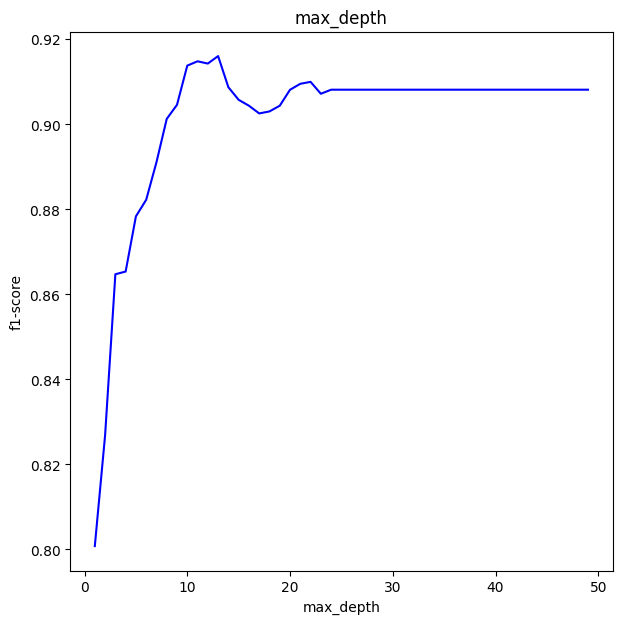

In [113]:
#creating a list of depth values
max_depth = np.arange(1,50)

#creating an empty list to store scores for each depth
f1_test_scores = []


# create a loop for the classifier to run with the different depth values
for depth in max_depth:

    #instantiate
    classifier = DecisionTreeClassifier(criterion='entropy',max_depth=depth,random_state=123)

    #fit the model
    classifier.fit(X_train,y_train)

    #predict values
    y_hat_test = classifier.predict(X_test)

    #calculate
    f1 = f1_score(y_test,y_hat_test,average='macro')


    #add the scores to the list
    f1_test_scores.append(f1)


#visualize the data
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(7,7))
ax.plot(max_depth,f1_test_scores,c='b')
ax.set_xlabel('max_depth')
ax.set_ylabel('f1-score')
ax.set_title('max_depth')

The accuracy of the model peaks at max_depth 12 and levels off. This will be the optimal value for the adjusted Decision Tree Model.



## Determining Optimal Min_Samples_Split

The min_samples_split parameter in a decision tree model specifies the minimum number of samples required to perform a split, which helps control the model's performance by preventing further splits if the number of samples at a node is below the specified threshold, thereby reducing the risk of overfitting. In the original min_samples_split default settings, the value was set to 2. Therefore the range will be set to include the default and higher values to see if a more optimal value for the parameter can be determined.

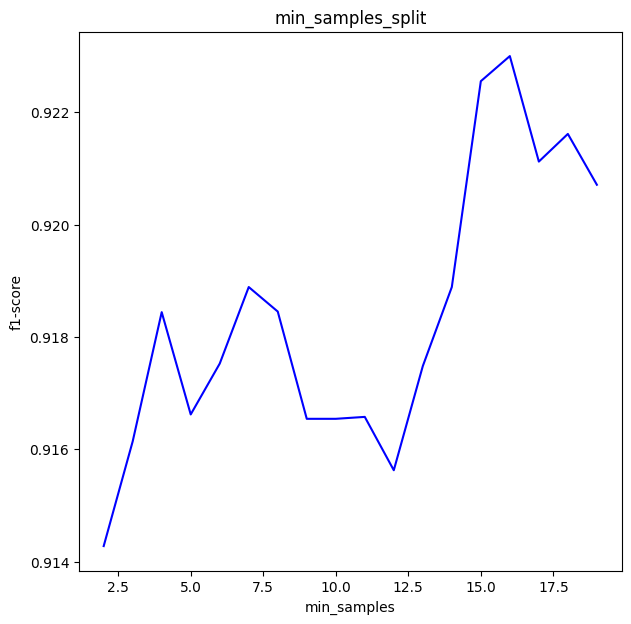

In [114]:
#use the optimum value of depth
depth = 12

#define a range of min_samples_for each split
min_samples_range = np.arange(2,20)

#create a loop with the optimum depth and different min_samples
#creating an empty list to store scores for each depth
f1_test_scores = []

# create a loop for the classifier to run with the different depth values
for sample in min_samples_range:

    #instantiate
    classifier = DecisionTreeClassifier(criterion='entropy',max_depth=depth,min_samples_split=sample,random_state=123)

    #fit the model
    classifier.fit(X_train,y_train)

    #predict values
    y_hat_test = classifier.predict(X_test)

    #calculate
    f1 = f1_score(y_test,y_hat_test,average='macro')

    #add the scores to the list
    f1_test_scores.append(f1)


#visualize
fig,ax = plt.subplots(figsize=(7,7))
ax.plot(min_samples_range,f1_test_scores,c='b')

ax.set_xlabel('min_samples')
ax.set_ylabel('f1-score')
ax.set_title('min_samples_split')
plt.show();

The accuracy of the model peaks at min_samples 16 and then sharply decreases. This will be the optimal value for the adjusted Decision Tree Model.

## Determining Optimal Min_Samples_Leaf

The min_samples_leaf parameter in a decision tree model specifies the minimum number of samples required to be at a leaf node, helping to control the model's performance by preventing the creation of leaf nodes with too few instances, which can reduce overfitting and improve generalization. The accuracy of the model peaks at min_samples 5 and then sharply decreases. This will be the optimal value for the adjusted Decision Tree Model.

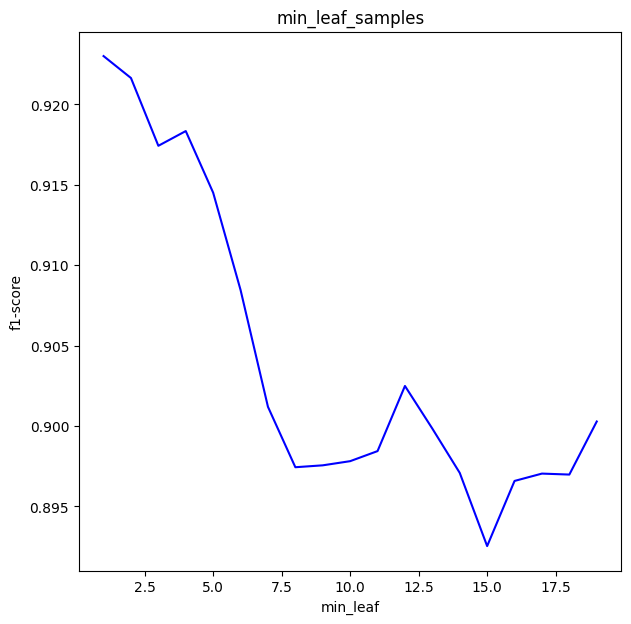

In [115]:
#use the optimum value of depth,min_samples_split
depth = 12
min_samples = 16

#define a range of min_samples_for each split
min_leaf_range = np.arange(1,20)

#create a loop with the optimum depth and different min_samples
#creating an empty list to store scores for each depth
f1_test_scores = []

# create a loop for the classifier to run with the different depth values
for sample in min_leaf_range:

    #instantiate
    classifier = DecisionTreeClassifier(criterion='entropy',max_depth=depth,min_samples_split=min_samples,
                                       min_samples_leaf=sample, random_state=123)

    #fit the model
    classifier.fit(X_train,y_train)

    #predict values
    y_hat_test = classifier.predict(X_test)

    #calculate
    f1 = f1_score(y_test,y_hat_test,average='macro')

    #add the scores to the list
    f1_test_scores.append(f1)


#visual
fig,ax = plt.subplots(figsize=(7,7))
ax.plot(min_leaf_range,f1_test_scores,c='b')

ax.set_xlabel('min_leaf')
ax.set_ylabel('f1-score')
ax.set_title('min_leaf_samples')

plt.show();

The accuracy of the model peaks at the min_leaf value of 1 and sharply decreases. This will be the optimal value for the adjusted Decision Tree Model.

## Decision Tree Model with Optimized Parameters

In [116]:
#run the model with the optimized parameters
depth=12
min_samples=16
leaf=1

#instantiate
classifier = DecisionTreeClassifier(criterion='entropy',max_depth=depth,min_samples_split=min_samples,
                                    min_samples_leaf=leaf,random_state=123)

#fit the model
classifier.fit(X_train,y_train)

#predict values
y_hat_train = classifier.predict(X_train)
y_hat_test = classifier.predict(X_test)

#scores
print('TRAIN SCORES')
print('---------------------------------------------------------')
print(classification_report(y_train,y_hat_train,target_names=names))
print('TEST SCORES')
print('----------------------------------------------------------')
print(classification_report(y_test,y_hat_test,target_names=names))

accuracy_optimized_train = accuracy_score(y_train,y_hat_train)
accuracy_optimized_test = accuracy_score(y_test,y_hat_test)

f1_score_optimized_train = f1_score(y_train,y_hat_train,average='macro')
f1_score_optimized_test = f1_score(y_test,y_hat_test,average='macro')

TRAIN SCORES
---------------------------------------------------------
              precision    recall  f1-score   support

   Satisfied       0.96      0.96      0.96      3504
Dissatisfied       0.95      0.96      0.95      3001

    accuracy                           0.96      6505
   macro avg       0.96      0.96      0.96      6505
weighted avg       0.96      0.96      0.96      6505

TEST SCORES
----------------------------------------------------------
              precision    recall  f1-score   support

   Satisfied       0.94      0.92      0.93      1180
Dissatisfied       0.91      0.93      0.92       989

    accuracy                           0.92      2169
   macro avg       0.92      0.92      0.92      2169
weighted avg       0.92      0.92      0.92      2169



Using the optimized parameters, overfitting to the train data series was reduced and the AUC and F1 score were inreased for the test data series. However tuning each individual hyperparameter is not as effective at finding the optimal parameters so a more sophisticated parameter tuning tool like grid search will be utilized.

## Tuning the Decision Tree with GridSearchCV

Since additional tuning can be done more effectively with the GridSearch tool, the ranges were expanded from the original parameter tuning in order to explore more possible values to find the optimal parameters. These additional values will be the criterion options and additional values will be explored in max_depth, min_samples_split, and min_samples_leaf.

In [119]:
#with strategy.scope():

clf = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_split': [1, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}

gs_tree = GridSearchCV(clf, param_grid, cv = 5, scoring='accuracy')
gs_tree.fit(X_train, y_train)

gs_tree.best_params_


{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 20}

In [120]:
#get predictions from the gridsearch

#with strategy.scope():

#predict values
y_gst_train = gs_tree.predict(X_train)
y_gst_test = gs_tree.predict(X_test)

#scores
print('TRAIN SCORES')
print('---------------------------------------------------------')
print(classification_report(y_train,y_gst_train,target_names=names))
print('TEST SCORES')
print('----------------------------------------------------------')
print(classification_report(y_test,y_gst_test,target_names=names))

accuracy_gst_train = accuracy_score(y_train,y_gst_train)
accuracy_gst_test = accuracy_score(y_test,y_gst_test)

f1_score_gst_train = f1_score(y_train,y_gst_train,average='macro')
f1_score_gst_test = f1_score(y_test,y_gst_test,average='macro')

TRAIN SCORES
---------------------------------------------------------
              precision    recall  f1-score   support

   Satisfied       0.95      0.94      0.95      3504
Dissatisfied       0.94      0.95      0.94      3001

    accuracy                           0.95      6505
   macro avg       0.94      0.95      0.94      6505
weighted avg       0.95      0.95      0.95      6505

TEST SCORES
----------------------------------------------------------
              precision    recall  f1-score   support

   Satisfied       0.93      0.91      0.92      1180
Dissatisfied       0.89      0.92      0.91       989

    accuracy                           0.91      2169
   macro avg       0.91      0.91      0.91      2169
weighted avg       0.91      0.91      0.91      2169



# Random Forest Classifier Model


In [121]:
#build a baseline Random Forest Classifier

rfc = RandomForestClassifier(class_weight='balanced')
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [122]:
  #predict values
  y_rfc_train = rfc.predict(X_train)
  y_rfc_test = rfc.predict(X_test)

In [123]:
#with strategy.scope():
#fit the model
rfc.fit(X_train,y_train)

#predict values
y_rfc_train = rfc.predict(X_train)
y_rfc_test = rfc.predict(X_test)

#scores
print('TRAIN SCORES')
print('---------------------------------------------------------')
print(classification_report(y_train,y_rfc_train,target_names=names))
print('TEST SCORES')
print('----------------------------------------------------------')
print(classification_report(y_test,y_rfc_test,target_names=names))

accuracy_rfc_train = accuracy_score(y_train,y_rfc_train)
accuracy_rfc_test = accuracy_score(y_test,y_rfc_test)

f1_score_rfc_train = f1_score(y_train,y_rfc_train,average='macro')
f1_score_rfc_test = f1_score(y_test,y_rfc_test,average='macro')

TRAIN SCORES
---------------------------------------------------------
              precision    recall  f1-score   support

   Satisfied       1.00      1.00      1.00      3504
Dissatisfied       1.00      1.00      1.00      3001

    accuracy                           1.00      6505
   macro avg       1.00      1.00      1.00      6505
weighted avg       1.00      1.00      1.00      6505

TEST SCORES
----------------------------------------------------------
              precision    recall  f1-score   support

   Satisfied       0.94      0.94      0.94      1180
Dissatisfied       0.93      0.93      0.93       989

    accuracy                           0.93      2169
   macro avg       0.93      0.93      0.93      2169
weighted avg       0.93      0.93      0.93      2169



## Tuning the Random Forest Classifier with GridSearchCV

In [124]:
#determine default parameters
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [125]:
#define a param grid based on defaults

param_grid = {'criterion':['gini','entropy'],
              'max_depth':[3,6,9,12,15,20],
              'min_samples_leaf': [1,5,10],
              'min_samples_split': [2,4,6,8]
             }

In [126]:
#fit the gridsearch
#with strategy.scope():
rf = RandomForestClassifier(class_weight= 'balanced')
grid_rfc = GridSearchCV(rf, param_grid, cv = 5, scoring='accuracy')
grid_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 6, 9, 12, 15, 20],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 4, 6, 8]},
             scoring='accuracy')

In [127]:
#print the best parameters
#with strategy.scope():
print(grid_rfc.best_params_)


{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [128]:
#get predictions from the gridsearch

#with strategy.scope():
#predict values
y_grf_train = grid_rfc.predict(X_train)
y_grf_test = grid_rfc.predict(X_test)

#scores
print('TRAIN SCORES')
print('---------------------------------------------------------')
print(classification_report(y_train,y_grf_train,target_names=names))
print('TEST SCORES')
print('----------------------------------------------------------')
print(classification_report(y_test,y_grf_test,target_names=names))

accuracy_grf_train = accuracy_score(y_train,y_grf_train)
accuracy_grf_test = accuracy_score(y_test,y_grf_test)

f1_score_grf_train = f1_score(y_train,y_grf_train,average='macro')
f1_score_grf_test = f1_score(y_test,y_grf_test,average='macro')

TRAIN SCORES
---------------------------------------------------------
              precision    recall  f1-score   support

   Satisfied       1.00      1.00      1.00      3504
Dissatisfied       1.00      1.00      1.00      3001

    accuracy                           1.00      6505
   macro avg       1.00      1.00      1.00      6505
weighted avg       1.00      1.00      1.00      6505

TEST SCORES
----------------------------------------------------------
              precision    recall  f1-score   support

   Satisfied       0.94      0.94      0.94      1180
Dissatisfied       0.93      0.93      0.93       989

    accuracy                           0.93      2169
   macro avg       0.93      0.93      0.93      2169
weighted avg       0.93      0.93      0.93      2169



# XGBoost Model

In [129]:
#with strategy.scope():
# Instantiate XGBClassifier
xgb = XGBClassifier(eval_metric='mlogloss')

# Fit XGBClassifier
xgb.fit(X_train, y_train)

# Predict on training and test sets
y_xgb_train = xgb.predict(X_train)
y_xgb_test = xgb.predict(X_test)

accuracy_xgb_train = accuracy_score(y_train,y_xgb_train)
accuracy_xgb_test = accuracy_score(y_test,y_xgb_test)

f1_score_xgb_train = f1_score(y_train,y_xgb_train,average='macro')
f1_score_xgb_test = f1_score(y_test,y_xgb_test,average='macro')

#scores
print('TRAIN SCORES')
print('---------------------------------------------------------')
print(classification_report(y_train,y_xgb_train,target_names=names))
print('TEST SCORES')
print('----------------------------------------------------------')
print(classification_report(y_test,y_xgb_test,target_names=names))

TRAIN SCORES
---------------------------------------------------------
              precision    recall  f1-score   support

   Satisfied       1.00      1.00      1.00      3504
Dissatisfied       1.00      1.00      1.00      3001

    accuracy                           1.00      6505
   macro avg       1.00      1.00      1.00      6505
weighted avg       1.00      1.00      1.00      6505

TEST SCORES
----------------------------------------------------------
              precision    recall  f1-score   support

   Satisfied       0.96      0.94      0.95      1180
Dissatisfied       0.93      0.95      0.94       989

    accuracy                           0.95      2169
   macro avg       0.94      0.95      0.94      2169
weighted avg       0.95      0.95      0.95      2169



## Tuning the XGBoost Model with GridSearchCV

In [130]:
  #determine default parameters
  xgb.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': 'mlogloss',
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [131]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0, 0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 6]
        }


In [132]:
#with strategy.scope():
xgb = XGBClassifier(eval_metric='mlogloss')
grid_xgb = GridSearchCV(xgb, params, scoring='accuracy', cv=None, n_jobs=1)
grid_xgb.fit(X_train, y_train)

best_xgb_parameters = grid_xgb.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_xgb_parameters.keys()):
  print('%s: %r' % (param_name, best_xgb_parameters[param_name]))

Grid Search found the following optimal parameters: 
colsample_bytree: 1.0
gamma: 0.5
max_depth: 6
min_child_weight: 1
subsample: 1.0


In [133]:
#get predictions from the gridsearch

#with strategy.scope():
#predict values
y_grid_xgb_train = grid_xgb.predict(X_train)
y_grid_xgb_test = grid_xgb.predict(X_test)

#scores
print('TRAIN SCORES')
print('---------------------------------------------------------')
print(classification_report(y_train,y_grid_xgb_train,target_names=names))
print('TEST SCORES')
print('----------------------------------------------------------')
print(classification_report(y_test,y_grid_xgb_test,target_names=names))

accuracy_grid_xgb_train = accuracy_score(y_train,y_grid_xgb_train)
accuracy_grid_xgb_test = accuracy_score(y_test,y_grid_xgb_test)

f1_score_grid_xgb_train = f1_score(y_train,y_grid_xgb_train,average='macro')
f1_score_grid_xgb_test = f1_score(y_test,y_grid_xgb_test,average='macro')

TRAIN SCORES
---------------------------------------------------------
              precision    recall  f1-score   support

   Satisfied       1.00      1.00      1.00      3504
Dissatisfied       1.00      1.00      1.00      3001

    accuracy                           1.00      6505
   macro avg       1.00      1.00      1.00      6505
weighted avg       1.00      1.00      1.00      6505

TEST SCORES
----------------------------------------------------------
              precision    recall  f1-score   support

   Satisfied       0.95      0.93      0.94      1180
Dissatisfied       0.92      0.95      0.93       989

    accuracy                           0.94      2169
   macro avg       0.94      0.94      0.94      2169
weighted avg       0.94      0.94      0.94      2169



# Neural Network

In [134]:
df_neural = smaller_dataset

In [135]:
dataset = df_neural.values

In [136]:
dataset

array([[0.000e+00, 3.700e+01, 3.785e+03, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 6.000e+01, 1.784e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [1.000e+00, 2.700e+01, 1.825e+03, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [1.000e+00, 2.300e+01, 1.334e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [0.000e+00, 5.700e+01, 1.074e+03, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 4.200e+01, 3.148e+03, ..., 1.000e+00, 0.000e+00,
        0.000e+00]])

In [137]:
dataset.shape

(8674, 27)

In [138]:
X = dataset[:,1:27].astype(float)
Y = dataset[:,0]

In [139]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

In [141]:
# baseline model
def create_baseline():
 # create model
 model = Sequential()
 model.add(Dense(26, input_shape=(26,), activation='relu'))
 model.add(Dense(1, activation='sigmoid'))
 # Compile model
 model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
 return model

In [142]:
#with strategy.scope():
# evaluate model with standardized dataset
estimator = KerasClassifier(model=create_baseline, epochs=100, batch_size=5, verbose=0)
kfold = StratifiedKFold(n_splits=4, shuffle=True)
f1_base_results = cross_val_score(estimator, X, encoded_Y, cv=kfold, scoring='f1_macro')
acc_base_results = cross_val_score(estimator, X, encoded_Y, cv=kfold)
#Print the mean and standard deviation of the F1 scores
print("Base F1 scores: %.2f%% (%.2f%%)" % (f1_base_results.mean() * 100, f1_base_results.std() * 100))
# Print the mean and standard deviation of the F1 scores
print("Base Acc scores: %.2f%% (%.2f%%)" % (acc_base_results.mean() * 100, acc_base_results.std() * 100))

Base F1 scores: 81.33% (2.80%)
Base Acc scores: 81.12% (1.97%)


## Re-Run the Baseline Model with Data Preparation

In [143]:
#with strategy.scope():
# evaluate baseline model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(model=create_baseline, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=4, shuffle=True)
f1_prep_results = cross_val_score(pipeline, X, encoded_Y, cv=kfold, scoring='f1_macro')
acc_prep_results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
# Print the mean and standard deviation of the F1 scores
print("Data Prep F1 scores: %.2f%% (%.2f%%)" % (f1_prep_results.mean() * 100, f1_prep_results.std() * 100))
# Print the mean and standard deviation of the F1 scores
print("Data Prep Acc scores: %.2f%% (%.2f%%)" % (acc_prep_results.mean() * 100, acc_prep_results.std() * 100))

Data Prep F1 scores: 91.72% (0.39%)
Data Prep Acc scores: 92.17% (0.82%)


## Evaluate a Smaller Dataset

In [144]:
# smaller model
def create_smaller():
 # create model
 model = Sequential()
 model.add(Dense(26, input_shape=(26,), activation='relu'))
 model.add(Dense(1, activation='sigmoid'))
 # Compile model
 model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
 return model

#with strategy.scope():
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(model=create_smaller, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=4, shuffle=True)
f1_small_results = cross_val_score(pipeline, X, encoded_Y, cv=kfold, scoring = 'f1_macro')
acc_small_results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Smaller F1: %.2f%% (%.2f%%)" % (f1_small_results.mean()*100, f1_small_results.std()*100))
print("Smaller Accuracy: %.2f%% (%.2f%%)" % (acc_small_results.mean()*100, acc_small_results.std()*100))

Smaller F1: 91.66% (0.70%)
Smaller Accuracy: 92.16% (0.20%)


## Evaluate a Larger Dataset

In [145]:
# larger model
def create_larger():
 # create model
 model = Sequential()
 model.add(Dense(26, input_shape=(26,), activation='relu'))
 model.add(Dense(30, activation='relu'))
 model.add(Dense(1, activation='sigmoid'))
 # Compile model
 model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
 return model

#with strategy.scope():
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(model=create_larger, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=4, shuffle=True)
f1_large_results = cross_val_score(pipeline, X, encoded_Y, cv=kfold, scoring='f1_macro')
acc_large_results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Larger F1: %.2f%% (%.2f%%)" % (f1_large_results.mean()*100, f1_large_results.std()*100))
print("Larger Accuracy: %.2f%% (%.2f%%)" % (acc_large_results.mean()*100, acc_large_results.std()*100))

Larger F1: 91.60% (0.37%)
Larger Accuracy: 91.63% (0.36%)


#Visualize Scores Between Models

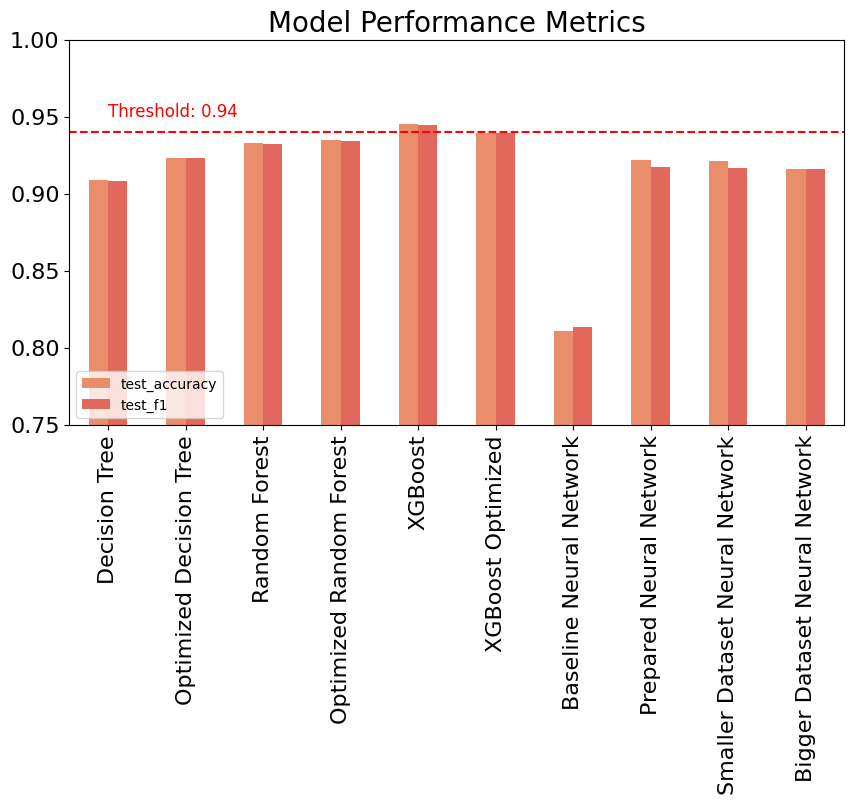

In [164]:
# Create a dataframe of the scores
score_df = pd.DataFrame({'test_accuracy': [accuracy_tree_test, accuracy_optimized_test, accuracy_rfc_test,
                                           accuracy_grf_test, accuracy_xgb_test, accuracy_grid_xgb_test,
                                           (acc_base_results.mean()), (acc_prep_results.mean()), (acc_small_results.mean()),
                                           (acc_large_results.mean())],
                         'test_f1': [f1_score_tree_test, f1_score_optimized_test, f1_score_rfc_test,
                                           f1_score_grf_test, f1_score_xgb_test, f1_score_grid_xgb_test,
                                     (f1_base_results.mean()), (f1_prep_results.mean()), (f1_small_results.mean()), (f1_large_results.mean())]
                        }, index=['Decision Tree', 'Optimized Decision Tree','Random Forest',
                                  'Optimized Random Forest', 'XGBoost', 'XGBoost Optimized', 'Baseline Neural Network',
                                  'Prepared Neural Network','Smaller Dataset Neural Network', 'Bigger Dataset Neural Network'])

# Plot the data
score_df.plot.bar(figsize=(10, 5))
plt.legend(loc='lower left')
plt.title('Model Performance Metrics', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Set y-axis limits
plt.ylim(0.75, 1)

# Add a horizontal line at 0.94
plt.axhline(0.94, color='r', linestyle='--')

# Add a label for the line
plt.text(0, 0.95, 'Threshold: 0.94', color='r', fontsize=12)

# Display the plot
plt.show();

In [169]:
top_3_models = score_df.sort_values('test_f1', ascending=False).head(3)

In [171]:
print(top_3_models)

                         test_accuracy   test_f1
XGBoost                       0.945136  0.944789
XGBoost Optimized             0.939604  0.939248
Optimized Random Forest       0.934993  0.934490


# Evaluation of Final Model

In [172]:
#with strategy.scope():
# Instantiate XGBClassifier
xgb = XGBClassifier(eval_metric='mlogloss')

# Fit XGBClassifier
xgb.fit(X_train, y_train)

# Predict on training and test sets
y_xgb_train = xgb.predict(X_train)
y_xgb_test = xgb.predict(X_test)

accuracy_xgb_train = accuracy_score(y_train,y_xgb_train)
accuracy_xgb_test = accuracy_score(y_test,y_xgb_test)

f1_score_xgb_train = f1_score(y_train,y_xgb_train,average='macro')
f1_score_xgb_test = f1_score(y_test,y_xgb_test,average='macro')

#scores
print('TRAIN SCORES')
print('---------------------------------------------------------')
print(classification_report(y_train,y_xgb_train,target_names=names))
print('TEST SCORES')
print('----------------------------------------------------------')
print(classification_report(y_test,y_xgb_test,target_names=names))

TRAIN SCORES
---------------------------------------------------------
              precision    recall  f1-score   support

   Satisfied       1.00      1.00      1.00      3504
Dissatisfied       1.00      1.00      1.00      3001

    accuracy                           1.00      6505
   macro avg       1.00      1.00      1.00      6505
weighted avg       1.00      1.00      1.00      6505

TEST SCORES
----------------------------------------------------------
              precision    recall  f1-score   support

   Satisfied       0.96      0.94      0.95      1180
Dissatisfied       0.93      0.95      0.94       989

    accuracy                           0.95      2169
   macro avg       0.94      0.95      0.94      2169
weighted avg       0.95      0.95      0.95      2169



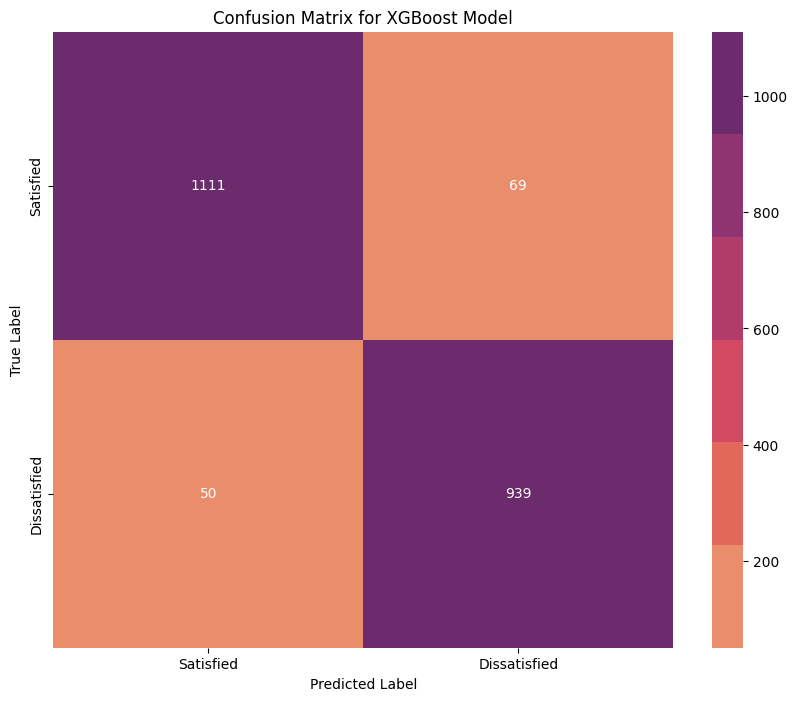

In [173]:
#Confusion Matrix for Baseline Decision Tree Model
cm = confusion_matrix(y_test, y_xgb_test)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap=pal, xticklabels=names, yticklabels=names)
plt.title("Confusion Matrix for XGBoost Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

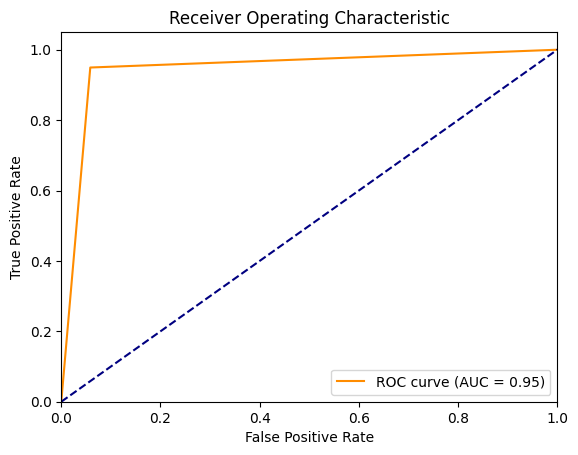

In [175]:
fpr, tpr, thresholds = roc_curve(y_test, y_xgb_test)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show();


## Confirming Final Model Selection with K Fold

In [175]:
# Define the number of folds
n_folds = 4

# Initialize an array to store the cross-validated F1 scores
f1_xgb_kfold_scores = []

# Initialize the k-fold cross-validation
kf = KFold(n_splits=n_folds, random_state=42, shuffle=True)

# Perform the cross-validation
for train_index, test_index in kf.split(X):
    # Split the data into training and testing sets for this fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Convert the data to DMatrix format for XGBoost
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)

    # Train the XGBoost model
    model = xgb.train(params, dtrain)

    # Make predictions on the test set
    y_pred = model.predict(dtest) >= 0.5

    # Calculate the F1 score for this fold
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

# Calculate the average F1 score across all folds
average_f1 = np.mean(f1_scores)

# Feature Importance

## XGBoost Built-In Feature Importance

## Permutation Based Feature Importance

## Feature Importance Computed with SHAP Values

# Final Model Interpretation

## Cost of Each Feature

# Conclusion

# Recommendations

# Next Steps

# References